In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
insurance = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/insurance.csv')
insurance.shape

(1338, 7)

In [4]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

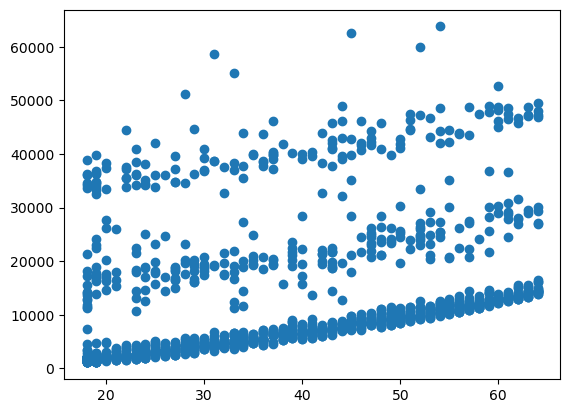

In [6]:
plt.scatter(x='age',y='charges',data=insurance)
plt.show()

Considering only age as feature

In [7]:
X = insurance[['age']]
y = insurance['charges']

In [8]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.08940589967885804

In [9]:
w,b = model.coef_, model.intercept_
w,b

(array([257.72261867]), 3165.8850060630284)

In [10]:
X.age*w[0]+b #predicted values

0        8062.614761
1        7804.892142
2       10382.118329
3       11670.731422
4       11413.008803
            ...     
1333    16052.015939
1334     7804.892142
1335     7804.892142
1336     8578.059998
1337    18886.964745
Name: age, Length: 1338, dtype: float64

In [11]:
y_predict = model.predict(X)
y_predict

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

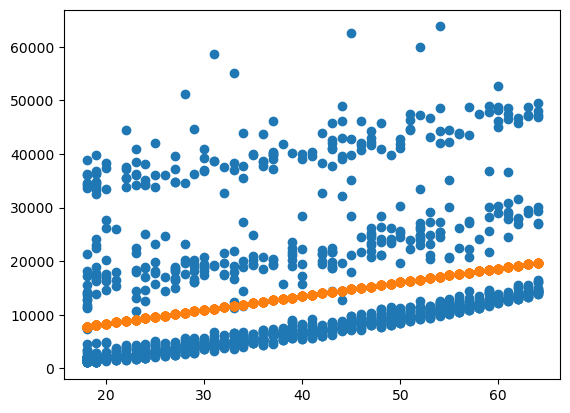

In [12]:
plt.scatter(x='age',y='charges',data=insurance)
plt.scatter(x=insurance.age,y=y_predict)
plt.show() #Regression line is little bit away from many of the data points

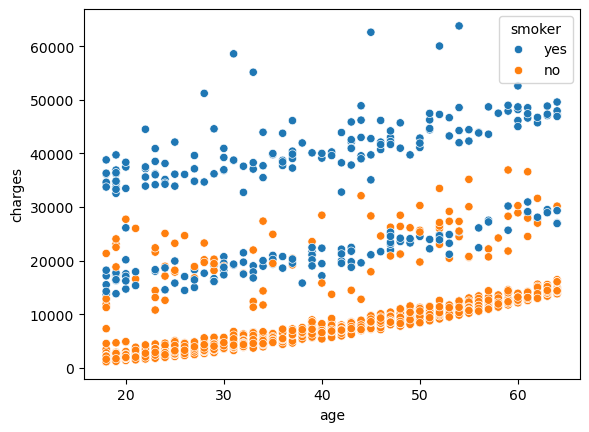

In [13]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=insurance)
plt.show()

In [14]:
insurance.groupby('smoker').describe()['charges'] #charges for smokers are veryhigh

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


To improve the accuracy, consider other feature smoker as well
Now feature are age, smoker

In [15]:
X = insurance[['age','smoker']]
y = insurance['charges']

In [16]:
X.head()

,age,smoker
0,19,yes
1,18,no
2,28,no
3,33,no
4,32,no


In [17]:
insurance = pd.get_dummies(insurance,columns=['smoker'],dtype='int32')
insurance.head()

,age,gender,bmi,children,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0


In [18]:
X = insurance[['age','smoker_yes']]
y = insurance['charges']

In [19]:
model.fit(X,y)
model.score(X,y)

0.7214008260577199

In [20]:
w,b = model.coef_,model.intercept_
w,b

(array([  274.87118587, 23855.30481666]), -2391.6263593585427)

In [21]:
X.age*w[0]+X.smoker_yes*w[1]+b

0       26686.230989
1        2556.054986
2        5304.766845
3        6679.122775
4        6404.251589
            ...     
1333    11351.932934
1334     2556.054986
1335     2556.054986
1336     3380.668544
1337    38230.820796
Length: 1338, dtype: float64

In [22]:
y_predict = model.predict(X)
y_predict

array([26686.23098893,  2556.05498639,  5304.76684514, ...,
        2556.05498639,  3380.66854402, 38230.82079568])

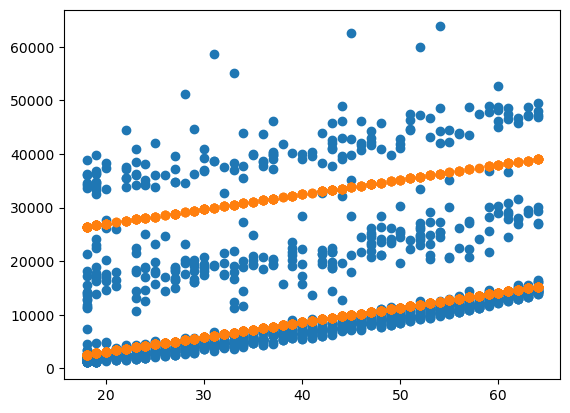

In [23]:
plt.scatter(x='age',y='charges',data=insurance)
plt.scatter(x=insurance.age,y=y_predict)
plt.show()

Here we got 2 lines, that indicates, smokers will have 23855 charges more than smoker's

first line is for smokers represented more charges
second line is non-smokers representing less charges than smokers

In [24]:
X = insurance[['age','smoker_no']] #we can consider smoker_yes or smoker_no or both smoker_yes, smoker_no 
                                   #because w's and b will adjust as per features we take
y = insurance['charges']

In [25]:
X

,age,smoker_no
0,19,0
1,18,1
2,28,1
3,33,1
4,32,1
...,...,...
1333,50,1
1334,18,1
1335,18,1
1336,21,1


In [26]:
model.fit(X,y)
model.score(X,y)

0.7214008260577199

In [27]:
w,b = model.coef_, model.intercept_
w,b

(array([   274.87118587, -23855.30481666]), 21463.678457304548)

In [28]:
y_predict = model.predict(X)
y_predict

array([26686.23098893,  2556.05498639,  5304.76684514, ...,
        2556.05498639,  3380.66854402, 38230.82079568])

<function matplotlib.pyplot.show(close=None, block=None)>

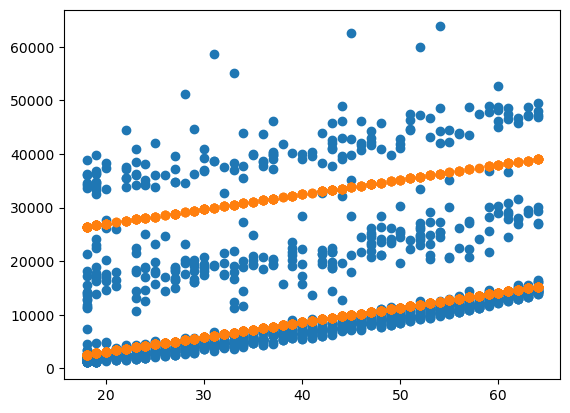

In [29]:
plt.scatter(x='age',y='charges',data=insurance)
plt.scatter(x=insurance.age,y=y_predict)
plt.show

In [30]:
X = insurance[['age','smoker_yes','smoker_no']]
y = insurance['charges']

In [31]:
model.fit(X,y)
model.score(X,y)

0.7214008260577199

In [32]:
w , b = model.coef_, model.intercept_
w , b

(array([   274.87118587,  11927.65240833, -11927.65240833]), 9536.026048972997)

when we consider both smoker_yes and smoker_no, value is 23855 is split it 11927, -11927

In [33]:
insurance.age*w[0]+X.smoker_yes*w[1]+X.smoker_no*w[2]+b

0       26686.230989
1        2556.054986
2        5304.766845
3        6679.122775
4        6404.251589
            ...     
1333    11351.932934
1334     2556.054986
1335     2556.054986
1336     3380.668544
1337    38230.820796
Length: 1338, dtype: float64

It's the same result - whether you take 1 feature or 2 features smoker_yes, smoker_no

In [34]:
insurance #One column is sufficient

,age,gender,bmi,children,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,1,0
1334,18,female,31.920,0,northeast,2205.98080,1,0
1335,18,female,36.850,0,southeast,1629.83350,1,0
1336,21,female,25.800,0,southwest,2007.94500,1,0


In [35]:
insurance = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/insurance.csv')
insurance.shape

(1338, 7)

In [36]:
insurance = pd.get_dummies(insurance,columns=['smoker'],dtype='int32',drop_first=True)
insurance.head()

,age,gender,bmi,children,region,charges,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0


In [37]:
insurance['bmi_30'] = insurance.bmi.apply(lambda x: 1 if x >= 30 else 0 )
insurance.head()

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30
0,19,female,27.900,0,southwest,16884.92400,1,0
1,18,male,33.770,1,southeast,1725.55230,0,1
2,28,male,33.000,3,southeast,4449.46200,0,1
3,33,male,22.705,0,northwest,21984.47061,0,0
4,32,male,28.880,0,northwest,3866.85520,0,0


In [38]:
insurance.groupby(['gender','bmi_30']).size()

gender  bmi_30
female  0         330
        1         335
male    0         301
        1         372
dtype: int64

To improve the accuracy further, consider bmi
if bmi > 30 then its a risk, hence made a feature bmi_30

if bm1 > 30 then 1 else 0

In [39]:
X = insurance[['age','smoker_yes','bmi_30']]
y = insurance['charges']

In [40]:
model.fit(X,y)
model.score(X,y)

0.7510542445314582

In [41]:
w, b = model.coef_, model.intercept_
w, b

(array([  262.09787358, 23839.98457577,  4191.33861417]), -4102.391280526499)

In [42]:
X.age*w[0]+X.smoker_yes*w[1]+X.bmi_30*w[2]+b

0       24717.452893
1        4806.709058
2        7427.687794
3        4546.838548
4        4284.740674
            ...     
1333    13193.841013
1334     4806.709058
1335     4806.709058
1336     1401.664065
1337    35725.563584
Length: 1338, dtype: float64

In [43]:
y_predict = model.predict(X)
y_predict

array([24717.45289326,  4806.70905808,  7427.68779388, ...,
        4806.70905808,  1401.66406465, 35725.56358362])

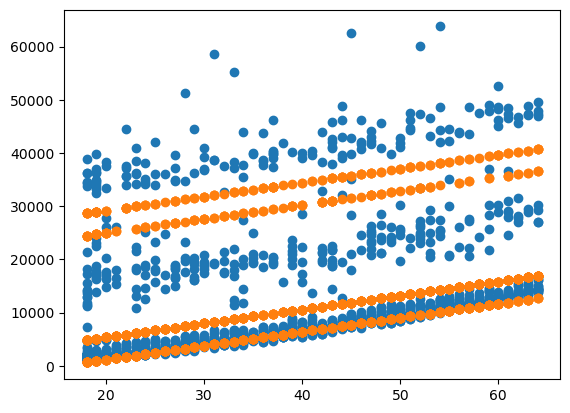

In [47]:
plt.scatter(x='age',y='charges',data=insurance)
plt.scatter(insurance.age,y_predict)
plt.show()

#difference between bottom two lines is 4191.33861417
#difference between first two lines is 23839.98457577
#These are from coeffients


In [48]:
X = insurance[['age','smoker_yes','bmi_30','children']]
y = insurance['charges']

In [49]:
model.fit(X,y)
model.score(X,y)

0.7532949928792966

In [50]:
w,b = model.coef_, model.intercept_
w,b

(array([  260.37618859, 23827.58625248,  4184.22837673,   475.98511836]),
 -4549.7576832767845)

In [51]:
y_predict = model.predict(X)
y_predict

array([24224.97615234,  4797.22720637,  8352.95932896, ...,
        4321.24208801,   918.14227704, 35160.77607297])

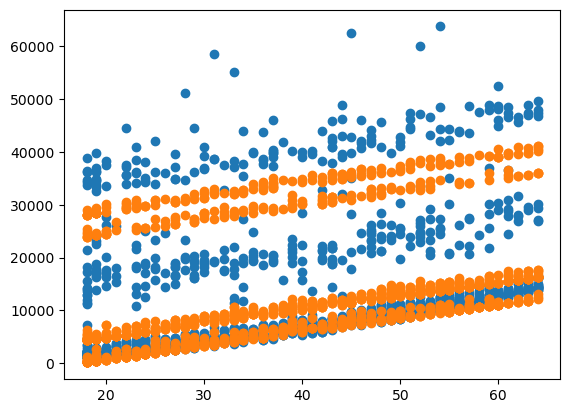

In [52]:
plt.scatter(x='age',y='charges',data=insurance)
plt.scatter(insurance.age,y_predict)
plt.show()

In [53]:
#no much change if we add children so remove

considering bmi_30 > 30 and smoker_yes in one feature

In [54]:
insurance['smoker_bmi_30'] = insurance.apply(lambda x: 1 if x['smoker_yes'] == 1 and x['bmi_30'] == 1 else 0,axis=1)

In [55]:
insurance.head()

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30
0,19,female,27.900,0,southwest,16884.92400,1,0,0
1,18,male,33.770,1,southeast,1725.55230,0,1,0
2,28,male,33.000,3,southeast,4449.46200,0,1,0
3,33,male,22.705,0,northwest,21984.47061,0,0,0
4,32,male,28.880,0,northwest,3866.85520,0,0,0


In [56]:
insurance[insurance.smoker_bmi_30 == 1]

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30
14,27,male,42.130,0,southeast,39611.75770,1,1,1
19,30,female,35.300,0,southwest,36837.46700,1,1,1
23,34,female,31.920,1,northeast,37701.87680,1,1,1
29,31,male,36.300,2,southwest,38711.00000,1,1,1
30,22,male,35.600,0,southwest,35585.57600,1,1,1
...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,southeast,62592.87309,1,1,1
1301,62,male,30.875,3,northwest,46718.16325,1,1,1
1308,25,female,30.200,0,southwest,33900.65300,1,1,1
1313,19,female,34.700,2,southwest,36397.57600,1,1,1


To improve accuracy further, from domain knowledge we got to know that -

If a person is smoker and bmi > 30 then he is at risk, hence made a column smoker_bmi_30

if smoker == 1 and bmi_30 == 1 then smoker_bmi_30 = 1

In [57]:
X = insurance[['age','smoker_yes','bmi_30','smoker_bmi_30']]
y = insurance['charges']

In [58]:
model.fit(X,y)
model.score(X,y)

0.858519730403536

In [59]:
w,b = model.coef_, model.intercept_
w,b

(array([  267.83246571, 13421.19373409,   142.99549683, 19705.01983857]),
 -2189.9335606085133)

In [60]:
y_predict = model.predict(X)
y_predict

array([16320.07702203,  2774.04631907,  5452.3709762 , ...,
        2774.04631907,  3434.54821937, 27569.04058199])

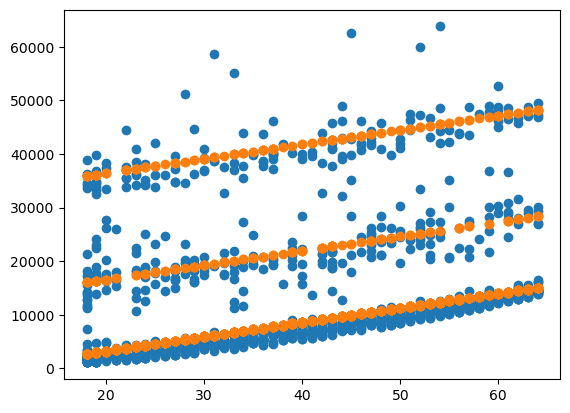

In [61]:
plt.scatter(x='age',y='charges',data=insurance)
plt.scatter(x=insurance.age,y=y_predict)
plt.show()

Bottom line is for non smoker and bmi is not considered here because smoker_bmi_30 also becomes 0



<AxesSubplot:xlabel='age', ylabel='charges'>

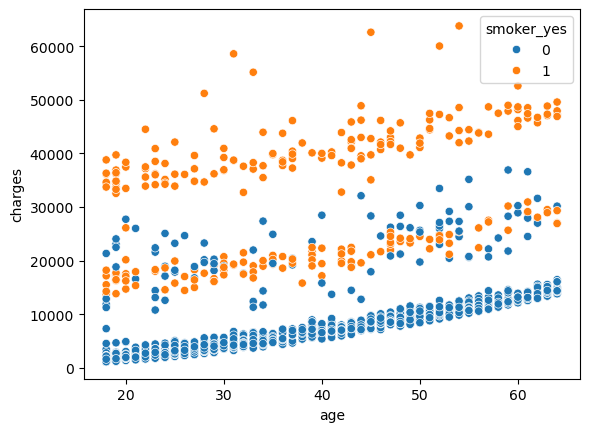

In [62]:
sns.scatterplot(x='age',y='charges',data=insurance,hue='smoker_yes')

<AxesSubplot:xlabel='age', ylabel='charges'>

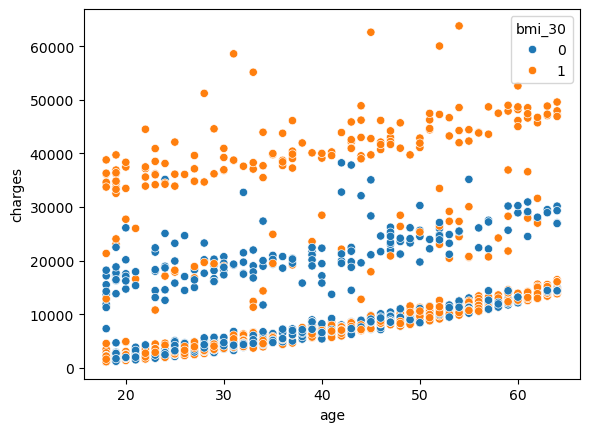

In [63]:
sns.scatterplot(x='age',y='charges',data=insurance,hue='bmi_30')

<AxesSubplot:xlabel='age', ylabel='charges'>

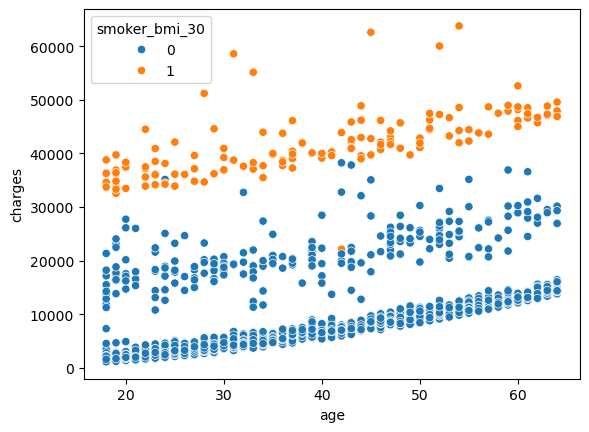

In [64]:
sns.scatterplot(x='age',y='charges',data=insurance,hue='smoker_bmi_30')

In [65]:
X = insurance[['age','smoker_yes','smoker_bmi_30']]
y = insurance['charges']

In [66]:
model.fit(X,y)
model.score(X,y)

0.8584922811178519

In [67]:
w,b = model.coef_, model.intercept_
w,b

(array([  268.22050372, 13346.2678987 , 19847.51295014]), -2129.686992276811)

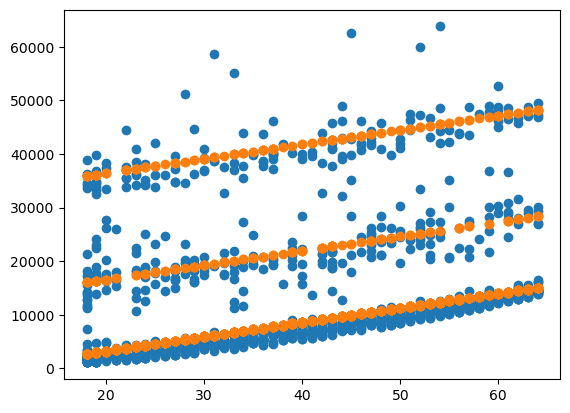

In [68]:
plt.scatter(x='age',y='charges',data=insurance)
plt.scatter(x=insurance.age,y=y_predict)
plt.show()

In [69]:
X.shape,w.shape

((1338, 3), (3,))

In [70]:
X.dot(w)+b

0       16312.770477
1        2698.282075
2        5380.487112
3        6721.589630
4        6453.369127
            ...     
1333    11281.338193
1334     2698.282075
1335     2698.282075
1336     3502.943586
1337    27578.031633
Length: 1338, dtype: float64

In [71]:
model.predict(X)

array([16312.77047702,  2698.2820746 ,  5380.48711176, ...,
        2698.2820746 ,  3502.94358575, 27578.03163307])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [73]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8478669447966337

In [74]:
y_predict = model.predict(X_test)

In [75]:
r2_score(y_test,y_predict)

0.8478669447966337

# Business Metrics

# 1) Average Charge per Customer

## Average Charges= ∑charges / Total Customers

In [108]:
insurance.charges.mean()

13270.422265141257

# 2) Total Premium Revenue

## Total Premium Revenue = ∑charges 

In [109]:
insurance.charges.sum()

17755824.990759

3) Charge Distribution by Gender

In [145]:
insurance

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30
0,19,female,27.900,0,southwest,16884.92400,1,0,0
1,18,male,33.770,1,southeast,1725.55230,0,1,0
2,28,male,33.000,3,southeast,4449.46200,0,1,0
3,33,male,22.705,0,northwest,21984.47061,0,0,0
4,32,male,28.880,0,northwest,3866.85520,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,1,0
1334,18,female,31.920,0,northeast,2205.98080,0,1,0
1335,18,female,36.850,0,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,southwest,2007.94500,0,0,0


# 3) Charge Distribution by Smoker Status

## Metric: Average charges for smokers vs. non-smokers.

In [157]:
insurance[['charges','smoker_yes']].groupby('smoker_yes').mean()

,charges
smoker_yes,
0,8434.268298
1,32050.231832


# 4) Charge Distribution by BMI

## Metric: Average charges by BMI category.

In [158]:
insurance[['charges','bmi_30']].groupby('bmi_30').mean()

,charges
bmi_30,
0,10713.666901
1,15552.335469


# 5) Average Charge vs. Number of Children

## Metric: Average charge by number of children.

In [160]:
insurance[['charges','children']].groupby('children').mean()

,charges
children,
0,12365.975602
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


In [162]:
insurance

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30
0,19,female,27.900,0,southwest,16884.92400,1,0,0
1,18,male,33.770,1,southeast,1725.55230,0,1,0
2,28,male,33.000,3,southeast,4449.46200,0,1,0
3,33,male,22.705,0,northwest,21984.47061,0,0,0
4,32,male,28.880,0,northwest,3866.85520,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,1,0
1334,18,female,31.920,0,northeast,2205.98080,0,1,0
1335,18,female,36.850,0,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,southwest,2007.94500,0,0,0


# 6) Risk Segmentation (Customer Profiling)

In [171]:
insurance['Risk_profile'] = insurance.apply(lambda x: "Risk" if x['smoker_bmi_30'] == 1 and x['age'] > 40 else "Not-At-Risk",axis=1)

In [172]:
insurance

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30,Risk_profile
0,19,female,27.900,0,southwest,16884.92400,1,0,0,Not-At-Risk
1,18,male,33.770,1,southeast,1725.55230,0,1,0,Not-At-Risk
2,28,male,33.000,3,southeast,4449.46200,0,1,0,Not-At-Risk
3,33,male,22.705,0,northwest,21984.47061,0,0,0,Not-At-Risk
4,32,male,28.880,0,northwest,3866.85520,0,0,0,Not-At-Risk
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,1,0,Not-At-Risk
1334,18,female,31.920,0,northeast,2205.98080,0,1,0,Not-At-Risk
1335,18,female,36.850,0,southeast,1629.83350,0,1,0,Not-At-Risk
1336,21,female,25.800,0,southwest,2007.94500,0,0,0,Not-At-Risk


## Creating a Hypothesis for Retention/Churn: we can hypothesize that:

## Customers with higher charges, higher BMI, or those identified as higher risk might have a higher likelihood of churn.

## Customers with a Risk_profile of "low" or "medium," low charges, and low BMI might be considered retained.

In [174]:
insurance.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [196]:
insurance['churn'] = insurance.apply(lambda x: 1 if x['age'] > 35 
                                     and x['smoker_bmi_30'] == 1 
                                     and x['Risk_profile'] == 'Risk' 
                                     and x['charges'] > 30000 
                                     else 0,axis = 1)

In [197]:
insurance[insurance.churn == 1]

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30,Risk_profile,churn
39,60,male,39.900,0,southwest,48173.36100,1,1,1,Risk,1
55,58,male,36.955,2,northwest,47496.49445,1,1,1,Risk,1
86,57,female,31.160,0,northwest,43578.93940,1,1,1,Risk,1
94,64,female,31.300,2,southwest,47291.05500,1,1,1,Risk,1
109,63,male,35.090,0,southeast,47055.53210,1,1,1,Risk,1
...,...,...,...,...,...,...,...,...,...,...,...
1241,64,male,36.960,2,southeast,49577.66240,1,1,1,Risk,1
1284,61,male,36.300,1,southwest,47403.88000,1,1,1,Risk,1
1300,45,male,30.360,0,southeast,62592.87309,1,1,1,Risk,1
1301,62,male,30.875,3,northwest,46718.16325,1,1,1,Risk,1


In [198]:
insurance

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30,Risk_profile,churn
0,19,female,27.900,0,southwest,16884.92400,1,0,0,Not-At-Risk,0
1,18,male,33.770,1,southeast,1725.55230,0,1,0,Not-At-Risk,0
2,28,male,33.000,3,southeast,4449.46200,0,1,0,Not-At-Risk,0
3,33,male,22.705,0,northwest,21984.47061,0,0,0,Not-At-Risk,0
4,32,male,28.880,0,northwest,3866.85520,0,0,0,Not-At-Risk,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,1,0,Not-At-Risk,0
1334,18,female,31.920,0,northeast,2205.98080,0,1,0,Not-At-Risk,0
1335,18,female,36.850,0,southeast,1629.83350,0,1,0,Not-At-Risk,0
1336,21,female,25.800,0,southwest,2007.94500,0,0,0,Not-At-Risk,0


## churn rate = No.of customers churning/Total number of customers

In [199]:
#Total customers = 68/1336

(68/1338)*100

5.082212257100149

5% is the churn rate

## Calculating Retention Rate

In [201]:
insurance[insurance.churn == 0]

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30,Risk_profile,churn
0,19,female,27.900,0,southwest,16884.92400,1,0,0,Not-At-Risk,0
1,18,male,33.770,1,southeast,1725.55230,0,1,0,Not-At-Risk,0
2,28,male,33.000,3,southeast,4449.46200,0,1,0,Not-At-Risk,0
3,33,male,22.705,0,northwest,21984.47061,0,0,0,Not-At-Risk,0
4,32,male,28.880,0,northwest,3866.85520,0,0,0,Not-At-Risk,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,1,0,Not-At-Risk,0
1334,18,female,31.920,0,northeast,2205.98080,0,1,0,Not-At-Risk,0
1335,18,female,36.850,0,southeast,1629.83350,0,1,0,Not-At-Risk,0
1336,21,female,25.800,0,southwest,2007.94500,0,0,0,Not-At-Risk,0


## Retention Rate = Number of customers retaining/Total no.of customers 

In [202]:
1270/1338

0.9491778774289985

Retention rate is 94%